In [ ]:
# import libraries 
import torch
import torch.nn as nn
from torch.autograd import Variable

In [ ]:
# create data
Xs = torch.Tensor([[0., 0.],
               [0., 1.],
               [1., 0.],
               [1., 1.]])

y = torch.Tensor([0., 1., 1., 0.]).reshape(Xs.shape[0], 1)

In [ ]:
class XOR(nn.Module):
    def __init__(self):
        super(XOR, self).__init__()
        self.linear = nn.Linear(2, 2)
        self.Sigmoid = nn.Sigmoid()
        self.linear2 = nn.Linear(2, 1)

    def forward(self, input):
      x = self.linear(input)
      sig = self.Sigmoid(x)
      yh = self.linear2(sig)
      return yh

In [ ]:
xor_network = XOR()

In [ ]:
epochs = 1000
mseloss = nn.MSELoss()
optimizer = torch.optim.Adam(xor_network.parameters(), lr = 0.03)
all_losses = []
current_loss = 0
plot_every = 50

for epoch in range(epochs):

  # input training example and return the prediction
  yhat = xor_network.forward(Xs)

  # calculate MSE loss
  loss = mseloss(yhat, y)
  
  # backpropogate through the loss gradiants
  loss.backward()

  # update model weights
  optimizer.step()

  # remove current gradients for next iteration
  optimizer.zero_grad()

  # append to loss
  current_loss += loss
  if epoch % plot_every == 0:
      all_losses.append(current_loss / plot_every)
      current_loss = 0
  
  # print progress
  if epoch % 500 == 0:
    print(f'Epoch: {epoch} completed')

Epoch: 0 completed
Epoch: 500 completed


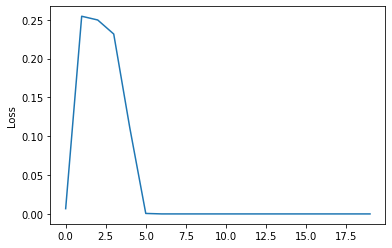

In [ ]:
import matplotlib.pyplot as plt
plt.plot(all_losses)
plt.ylabel('Loss')
plt.show()

In [ ]:
# show weights and bias
for name, param in xor_network.named_parameters():
    if param.requires_grad:
        print(name, param.data)

linear.weight tensor([[-3.7707,  3.6791],
        [-5.6279,  5.1548]])
linear.bias tensor([ 1.4862, -3.2543])
linear2.weight tensor([[-1.4605,  1.5144]])
linear2.bias tensor([1.1348])


In [ ]:
# test input
input = torch.tensor([1., 1.])
out = xor_network(input)
print(out.round())

tensor([0.], grad_fn=<RoundBackward>)
